# CLUSTERING ALGORITHM
KINBIOTICS_NER



In this notebook, we explore the clustering of symptom data extracted from the dataset using natural language processing techniques.
The main steps involved are data preprocessing, vectorization of symptoms using Word2Vec, calculating cosine similarity between symptom vectors, and applying K-Means clustering to group similar symptoms.
We evaluate the clustering performance using metrics such as Silhouette coefficient, Davies-Bouldin Score, and Calinski-Harabasz Score, aiming to determine the optimal number of clusters.
Finally, we visualize the clustering results and discuss the insights gained from the analysis.

In [1]:
# # Import necessary libraries
import pandas as pd
import numpy as np
import json

from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt

In [2]:
# Load and display the dataset
df = pd.read_csv('C:\\Users\\valif\\OneDrive\\Desktop\\Medical_notes_expl\\NER\\KINBIOTICS_NER.csv')

In [5]:
first_entity = df.at[0, 'label']
print(first_entity)

[{"start": 2946, "end": 2958, "text": "enterococcus", "labels": ["Pathogen"]}, {"start": 18, "end": 37, "text": "pancreatic necrosis", "labels": ["Symptom"]}, {"start": 39, "end": 45, "text": "sepsis", "labels": ["Symptom"]}, {"start": 47, "end": 66, "text": "respiratory failure", "labels": ["Symptom"]}, {"start": 151, "end": 175, "text": "necrotizing pancreatitis", "labels": ["Symptom"]}, {"start": 199, "end": 218, "text": "respiratory failure", "labels": ["Symptom"]}, {"start": 220, "end": 230, "text": "bacteremia", "labels": ["Symptom"]}, {"start": 291, "end": 302, "text": "hypotension", "labels": ["Symptom"]}, {"start": 627, "end": 651, "text": "necrotizing pancreatitis", "labels": ["Symptom"]}, {"start": 728, "end": 733, "text": "shock", "labels": ["Symptom"]}, {"start": 735, "end": 754, "text": "respiratory failure", "labels": ["Symptom"]}, {"start": 988, "end": 999, "text": "hypotension", "labels": ["Symptom"]}, {"start": 1025, "end": 1038, "text": "mild diarrhea", "labels": ["S

In [ ]:

# Symptoms extraction
def extract_symptoms(row):
    symptoms = []
    try:
        labels = json.loads(row['label'])
        for item in labels:
            if 'Symptom' in item['labels']:
                symptoms.append(item['text'])
    except (TypeError, ValueError):
        pass
    return symptoms

# Pathogens extraction
def extract_pathogens(row):
    pathogens = []
    try:
        labels = json.loads(row['label'])
        for item in labels:
            if 'Pathogen' in item['labels']:
                pathogens.append(item['text'])
    except (TypeError, ValueError):
        pass
    return pathogens

# Creations of the new columns "Symptoms" and "Pathogen"
df['Symptoms'] = df.apply(extract_symptoms, axis=1)
df['Pathogen'] = df.apply(extract_pathogens, axis=1)

# Conversion of symptom and pathogen lists into comma-separated strings
df['Symptoms'] = df['Symptoms'].apply(lambda x: ', '.join(x))
df['Pathogen'] = df['Pathogen'].apply(lambda x: ', '.join(x))

# Visualisation of the new DataFrame
print(df)


In [7]:
df

,ID,text,id,label,annotator,annotation_id,created_at,updated_at,lead_time,Symptoms,Pathogen
0,30579,"Chief Complaint:\n pancreatic necrosis, sepsis...",110,"[{""start"": 2946, ""end"": 2958, ""text"": ""enteroc...",4,103,2023-01-09T12:50:16.935407Z,2023-04-27T09:12:47.685596Z,105.629,"pancreatic necrosis, sepsis, respiratory failu...","enterococcus, cns"
1,2165,Chief Complaint:\n anemia and rising creatinin...,187,"[{""start"": 2158, ""end"": 2165, ""text"": ""e. coli...",4,179,2023-01-09T12:56:31.788996Z,2023-01-24T11:47:14.054000Z,334.146,"anemia, rising creatinine, anemic, 1 month of ...","e. coli, e coli, citrobacter, citrobacter, gnr..."
2,50913,"Chief Complaint:\n fever, abdominal pain, hypo...",179,"[{""start"": 18, ""end"": 23, ""text"": ""fever"", ""la...",4,171,2023-01-09T12:55:53.949142Z,2023-01-24T11:40:31.894971Z,37.923,"fever, abdominal pain, hypotension, intermitte...",
3,91525,Chief Complaint:\n rigors\n\nHistory of Presen...,173,"[{""start"": 1365, ""end"": 1375, ""text"": ""klebsie...",4,166,2023-01-09T12:55:25.402331Z,2023-01-24T11:39:07.485209Z,57.279,"rigors, chills, rigors, sweats, appetite recen...","klebsiella, enterococcus, enterococcus, entero..."
4,54757,"Chief Complaint:\n fevers, bacteremia\n\nHisto...",171,"[{""start"": 18, ""end"": 24, ""text"": ""fevers"", ""l...",4,164,2023-01-09T12:55:19.594235Z,2023-01-24T11:37:58.799081Z,44.431,"fevers, bacteremia, cholangiocarcinoma, anasta...",pan-sensitive enterococcus faecalis
...,...,...,...,...,...,...,...,...,...,...,...
367,21990,"Chief Complaint:\n fever, altered mental statu...",117,"[{""start"": 1498, ""end"": 1502, ""text"": ""mrsa"", ...",4,110,2023-01-09T12:50:45.574544Z,2023-01-09T12:50:45.574577Z,2.027,"fever, altered mental status, fever, altered m...","mrsa, coag negative staph, corynebacerium"
368,49247,"Chief Complaint:\n dyspnea, chest pain\n\nHist...",114,"[{""start"": 18, ""end"": 25, ""text"": ""dyspnea"", ""...",4,107,2023-01-09T12:50:35.990120Z,2023-01-09T12:50:35.990159Z,1.647,"dyspnea, chest pain, dyspnea, abdominal pain, ...",
369,6930,Chief Complaint:\n fever\n\nHistory of Present...,108,"[{""start"": 18, ""end"": 23, ""text"": ""fever"", ""la...",4,101,2023-01-09T12:49:48.429080Z,2023-01-09T12:49:48.429113Z,2.319,"fever, sternal wound drainage, rash, fevers, m...",methicillin sensitive staph aureus
370,11050,"Chief Complaint:\n fever, abd pain\n\nHistory ...",101,"[{""start"": 18, ""end"": 23, ""text"": ""fever"", ""la...",4,94,2023-01-09T12:48:40.440134Z,2023-01-09T12:48:40.440163Z,14.887,"fever, abd pain, intractable abdominal pain, n...",


In [ ]:
# Dataframe expansion in order to have a single symptom in each row
expanded_rows = []
for index, row in df.iterrows():
    symptoms = row['Symptoms'].split(', ')
    for symptom in symptoms:
        expanded_row = row.copy()
        expanded_row['Symptoms'] = symptom
        expanded_rows.append(expanded_row)

expanded_df = pd.DataFrame(expanded_rows)

print(expanded_df)

In [9]:
expanded_df

,ID,text,id,label,annotator,annotation_id,created_at,updated_at,lead_time,Symptoms,Pathogen
0,30579,"Chief Complaint:\n pancreatic necrosis, sepsis...",110,"[{""start"": 2946, ""end"": 2958, ""text"": ""enteroc...",4,103,2023-01-09T12:50:16.935407Z,2023-04-27T09:12:47.685596Z,105.629,pancreatic necrosis,"enterococcus, cns"
0,30579,"Chief Complaint:\n pancreatic necrosis, sepsis...",110,"[{""start"": 2946, ""end"": 2958, ""text"": ""enteroc...",4,103,2023-01-09T12:50:16.935407Z,2023-04-27T09:12:47.685596Z,105.629,sepsis,"enterococcus, cns"
0,30579,"Chief Complaint:\n pancreatic necrosis, sepsis...",110,"[{""start"": 2946, ""end"": 2958, ""text"": ""enteroc...",4,103,2023-01-09T12:50:16.935407Z,2023-04-27T09:12:47.685596Z,105.629,respiratory failure,"enterococcus, cns"
0,30579,"Chief Complaint:\n pancreatic necrosis, sepsis...",110,"[{""start"": 2946, ""end"": 2958, ""text"": ""enteroc...",4,103,2023-01-09T12:50:16.935407Z,2023-04-27T09:12:47.685596Z,105.629,necrotizing pancreatitis,"enterococcus, cns"
0,30579,"Chief Complaint:\n pancreatic necrosis, sepsis...",110,"[{""start"": 2946, ""end"": 2958, ""text"": ""enteroc...",4,103,2023-01-09T12:50:16.935407Z,2023-04-27T09:12:47.685596Z,105.629,respiratory failure,"enterococcus, cns"
...,...,...,...,...,...,...,...,...,...,...,...
371,19533,Chief Complaint:\n abdominal pain nausea/vomit...,97,"[{""start"": 18, ""end"": 32, ""text"": ""abdominal p...",4,90,2023-01-09T12:48:02.704615Z,2023-01-09T12:48:02.704685Z,580.473,diarrhea,
371,19533,Chief Complaint:\n abdominal pain nausea/vomit...,97,"[{""start"": 18, ""end"": 32, ""text"": ""abdominal p...",4,90,2023-01-09T12:48:02.704615Z,2023-01-09T12:48:02.704685Z,580.473,hypotensive,
371,19533,Chief Complaint:\n abdominal pain nausea/vomit...,97,"[{""start"": 18, ""end"": 32, ""text"": ""abdominal p...",4,90,2023-01-09T12:48:02.704615Z,2023-01-09T12:48:02.704685Z,580.473,fever,
371,19533,Chief Complaint:\n abdominal pain nausea/vomit...,97,"[{""start"": 18, ""end"": 32, ""text"": ""abdominal p...",4,90,2023-01-09T12:48:02.704615Z,2023-01-09T12:48:02.704685Z,580.473,emesis,


In [5]:
# Create a new DataFrame with unique symptoms; this will be the starting point for the clustering part
unique_symptoms_df = expanded_df[['Symptoms']].drop_duplicates().reset_index(drop=True)
unique_symptoms_df

,Symptoms
0,pancreatic necrosis
1,sepsis
2,respiratory failure
3,necrotizing pancreatitis
4,bacteremia
...,...
1911,intractable abdominal pain
1912,yellowish loose/watery stool
1913,rim-enhancing fulid collection
1914,prevented her from eating


In [6]:
# Get the list of all symptoms
all_symptoms_list = unique_symptoms_df['Symptoms'].tolist()
#for symptom in all_symptoms_list:
    #print(symptom)

# DATA PREPROCESSING
This code preprocesses symptom data and calculates cosine similarity between symptom vectors.\
After preprocessing the symptom data, it trains a Word2Vec model to generate vector representations for each symptom.\
The **Word2Vec** model is a deep learning algorithm capable of efficiently capturing the semantic meaning of words and their relationships.
In practice, it converts words into vectors of real numbers, called *word embeddings*, which then capture the semantic features of words and represent them in a vector space.\
Subsequently, these word vectors obtained from the Word2Vec model are used to calculate the similarity between symptom vectors using **cosine similarity**.
This measure provides an estimate of how two words are semantically similar based on the direction and length of their vectors in their vector space.

In [7]:
# Train the Word2Vec model on symptoms data
word2vec_model = Word2Vec(sentences=[[str(i)] for i in range(len(all_symptoms_list))], vector_size=100, window=5, min_count=1, sg=1)

# Calculate the average vector representation for each symptom
symptoms_vectors = []
for i in range(len(all_symptoms_list)):
    word = str(i)
    if word in word2vec_model.wv:
        vectors = word2vec_model.wv[word]
        symptoms_vectors.append(vectors)
    else:
        # If there are no vectors for this symptom, create a zero vector
        symptoms_vectors.append(np.zeros(word2vec_model.vector_size))

# Convert the list of vectors into a numpy array
symptoms_vectors = np.array(symptoms_vectors)

# Calculate the cosine similarity between symptom vectors
cosine_similarities = cosine_similarity(symptoms_vectors)


# Clustering evaluation

To select the optimal number of clusters obtained from the K-Means algorithm, three metrics were considered:

**Silhouette score**: This metric measures the cohesion within clusters and the separation between clusters. A value closer to 1 indicates that samples are correctly assigned to the cluster.\
**Davies-Bouldin Score**: This metric evaluates the compactness of clusters and the separation between them. A lower value indicates a better partition, where clusters are compact and separated.\
**Calinski-Harabasz Score**: This metric assesses the intra-cluster dispersion compared to the inter-cluster dispersion. A higher value indicates a better cluster structure.

C:\Users\valif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\valif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\valif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\ba

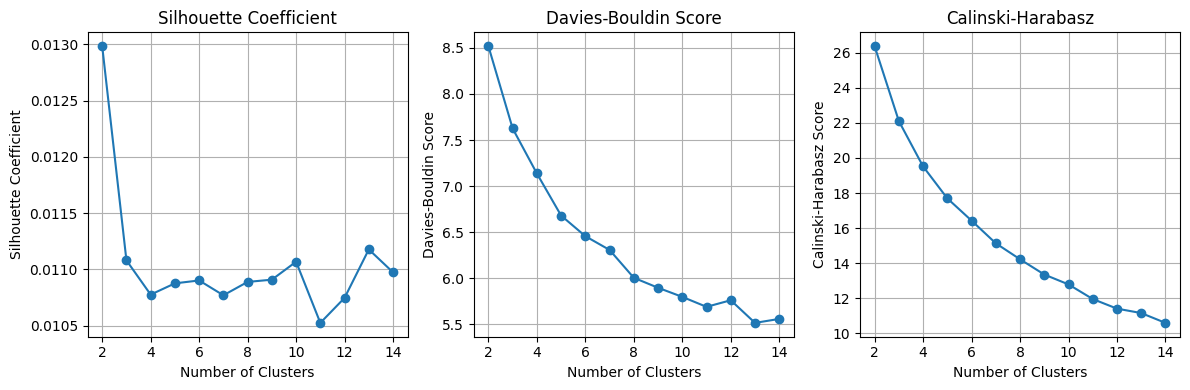

In [8]:
# Calculate the three metrics for different numbers of clusters
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

possible_num_clusters = range(2, 15)  # Try from 2 to 14 clusters
for num_clusters in possible_num_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(cosine_similarities)  # Here, we should use the similarities calculated for symptoms_df

    silhouette_scores.append(silhouette_score(cosine_similarities, cluster_labels))  # Here, we should use the similarities calculated for symptoms_df
    davies_bouldin_scores.append(davies_bouldin_score(cosine_similarities, cluster_labels))  # Here, we should use the similarities calculated for symptoms_df
    calinski_harabasz_scores.append(calinski_harabasz_score(cosine_similarities, cluster_labels))  # Here, we should use the similarities calculated for symptoms_df

# Visualization of the plots for different metrics
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(possible_num_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(possible_num_clusters, davies_bouldin_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(possible_num_clusters, calinski_harabasz_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz')
plt.grid(True)

plt.tight_layout()
plt.show()


Taking into account the three metrics (Silhouette, Davies-Bouldin, and Calinski) and considering the premises made earlier, it seems that the most appropriate number of clusters is 8.

# Clustering

To perform clustering, we chose to use the K-Means algorithm, which groups data based on their similarity.

1. **Initialization of centroids**: The first step involves randomly selecting K points in the dataset as initial centroids, which are the initial centers of each cluster.
2. **Assignment of points to the nearest cluster**: For each point in the dataset, its distance from each centroid is calculated, and the point is assigned to the cluster whose centroid is closest to it.
3. **Recalculation of centroids**: Once all points have been assigned to clusters, the centroids are recalculated for each cluster.
4. **Iteration until Convergence**: The previous steps are repeated until the centroids do not change significantly or until a maximum number of predefined iterations is reached.

In [8]:

optimal_num_clusters = 11

# Applica KMeans con il numero ottimale di cluster
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(cosine_similarities)

# Visualizza le etichette dei cluster
print(cluster_labels)

C:\Users\valif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\valif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\valif\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\ba

[ 2  5  1 ...  5 10  0]


In observing the count of elements in each cluster, it can be noticed that they are numerically homogeneous

In [10]:
# Count the number of elements in each cluster
cluster_counts = pd.Series(cluster_labels).value_counts()
cluster_counts_sorted = cluster_counts.sort_index()

print(cluster_counts_sorted)


0     168
1     189
2     196
3     185
4     152
5     160
6     181
7     156
8     177
9     195
10    157
Name: count, dtype: int64


In [ ]:
# Create a dictionary to associate symptom indices with their respective clusters
symptoms_per_cluster = {}
for cluster_label in range(optimal_num_clusters):
    symptoms_per_cluster[cluster_label] = []

for i, label in enumerate(cluster_labels):
    symptoms_per_cluster[label].append(i)

# Print the list of symptoms for each cluster
for cluster_label, symptoms in symptoms_per_cluster.items():
    print(f"Cluster {cluster_label}:")
    for symptom_index in symptoms:
        print(all_symptoms_list[symptom_index])
    print("\n")


In [18]:
cluster_content={}

for key in symptoms_per_cluster.keys():
    cluster_content[key]=[all_symptoms_list[i] for i in symptoms_per_cluster[key] ]

In [22]:
import json

with open('cluster_content.txt', 'w') as fp:
    json.dump(cluster_content, fp)



In [ ]:
# Choose the cluster of your interest
cluster_of_interest = 3
symptoms_in_cluster = [i for i, label in enumerate(cluster_labels) if label == cluster_of_interest]
print(f"Sintomi nel cluster {cluster_of_interest}:")
for symptom_index in symptoms_in_cluster:
    print(all_symptoms_list[symptom_index])


Although 8 seems to be the optimal number of clusters to consider, experimenting with a higher number yields better and more cohesive results within each cluster, despite the decrease in Calinski's index as the number of clusters increases. For instance, considering 11 clusters, we can observe the following:

Cluster 0 predominantly contains **gastrointestinal issues**, such as LUQ pain, chronic severe abdominal pain, RUQ pain, bright red blood, onset of jaundice, and bilious emesis.
Cluster 1 is primarily characterized by **cardiovascular problems**, including thoracoabdominal aortic aneurysm, peripheral edema, decreased blood pressure, severe mitral regurgitation, and ECG abnormalities.
Cluster 2 is dominated by **pulmonary issues**, such as shortness of breath, aspiration pneumonia, pneumonitis, pseudomonal pneumonia, and RML pneumonia.
Cluster 3 mainly exhibits **renal problems**, such as an increase in creatinine value on labs, low uo, urosepsis, rt back pain, left flank pain, and urethral lesion.
Continuing with the analysis, it was observed that each cluster predominantly features similar symptoms, such as **pancreatic, neurological, metabolic, hematological, and infectious issues**. Additionally, **general symptoms** like nausea, fever, fatigue, drowsiness, and cough are recurrent across all clusters.